# Modeling Rule Generation

Modeling with entropy based rule generation in decision tree data structure.

In [1]:
from pathlib import Path
import sys
import os

repo_root = Path.cwd().parent.resolve() 
sys.path.insert(0, str(repo_root))

In [2]:
DATA_PATH = "../ews/data/dataset/processed_draft_1_cp_4.csv"
SEQUENCE_PATH = "../ews/data/dataset/sequence_mining_output.csv"
OUTPUT_DIR = "../ews/daa/ews_artifacts"
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [3]:
from ews.rule_generation.modeling_prep import prepare_all_disasters_dataset

X, y = prepare_all_disasters_dataset(data_path=DATA_PATH, sequence_path=SEQUENCE_PATH, drop_columns=["boat_type", "role"], agg_method='sum')

y = y.replace({"low": "moderate"})

X.head()

Detected disaster types: ['Cr', 'Ts', 'Wn', 'Wv']

✅ Combined dataset ready (sum-aggregated): 247 samples, 76 features.


,fisherman_age,fisherman_experience_years,province,life_threatening_disaster_count,how_often_used_signs,how_long_used_signs_years,has_Wn-3_Wn-8,has_Wn-3_Wn-8_Wn-9,has_Wn-3_Wn-8_Wn-11,has_Wn-3_Wn-9,...,has_Wn-2_Wn-14,has_Wn-5_Wn-8,has_Ts-6_Ts-7,has_Wn-12_Wn-16,has_Wn-12_Wn-15,has_Wn-13_Wn-16,num_matched_rules,pattern_intensity,pattern_ratio,weighted_sum_norm
0,23,3,Aceh,2,3.5,3,0,0,0,0,...,0,0,0,0,0,0,0,Low,0.000000,0.000000
1,40,10,Aceh,2,18.0,10,0,0,0,0,...,0,0,0,0,0,0,4,Medium,6.257143,0.682431
2,52,25,Aceh,5,18.0,25,0,0,0,0,...,0,0,0,0,0,0,6,High,9.385714,1.000000
3,52,25,Aceh,8,18.0,22,0,0,0,0,...,0,0,0,0,0,0,0,Low,0.000000,0.000000
4,49,26,Aceh,1,30.0,22,0,0,0,0,...,0,0,0,0,0,0,11,High,17.207143,1.000000


SPM cols: 66, context cols: 13

=== Base Model Performance ===
              precision    recall  f1-score  support
high           0.714286  0.689655  0.701754    29.00
moderate       0.590909  0.619048  0.604651    21.00
accuracy       0.660000  0.660000  0.660000     0.66
macro avg      0.652597  0.654351  0.653203    50.00
weighted avg   0.662468  0.660000  0.660971    50.00
Confusion matrix:
 [[20  9]
 [ 8 13]]

Best Parameters: {'ccp_alpha': 0.02, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}

=== Tuned Model Performance ===
              precision    recall  f1-score  support
high           0.750000  0.827586  0.786885    29.00
moderate       0.722222  0.619048  0.666667    21.00
accuracy       0.740000  0.740000  0.740000     0.74
macro avg      0.736111  0.723317  0.726776    50.00
weighted avg   0.738333  0.740000  0.736393    50.00
Confusion matrix:
 [[24  5]
 [ 8 13]]


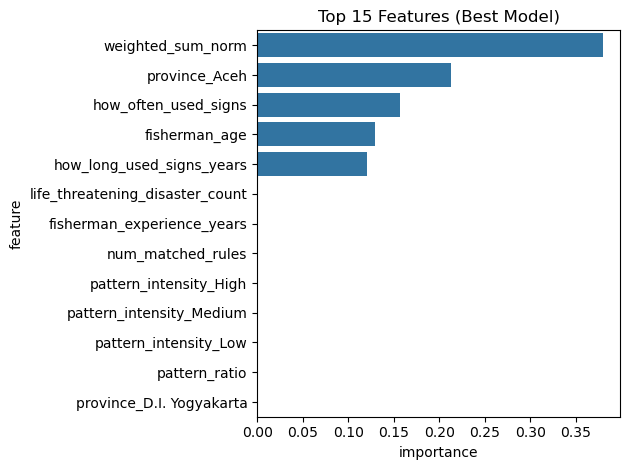


=== Decision Tree Rules (Best Model) ===
|--- weighted_sum_norm <= 0.18
|   |--- province_Aceh <= 0.50
|   |   |--- class: moderate
|   |--- province_Aceh >  0.50
|   |   |--- how_long_used_signs_years <= 11.50
|   |   |   |--- fisherman_age <= 25.50
|   |   |   |   |--- class: high
|   |   |   |--- fisherman_age >  25.50
|   |   |   |   |--- how_often_used_signs <= 3.25
|   |   |   |   |   |--- class: high
|   |   |   |   |--- how_often_used_signs >  3.25
|   |   |   |   |   |--- class: moderate
|   |   |--- how_long_used_signs_years >  11.50
|   |   |   |--- class: high
|--- weighted_sum_norm >  0.18
|   |--- class: high



In [4]:
from ews.rule_generation.model_fit import fit_hybrid_model

params_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, 9],
    "min_samples_leaf": [2, 3, 4, 5],
    "min_samples_split": [2, 4, 6],
    "ccp_alpha": [0.0, 0.001, 0.005, 0.01, 0.02] 
}

result = fit_hybrid_model(
    X, y,
    params_grid=params_grid,
    cv_splits=5,
    plot=True,
    random_state=42
)

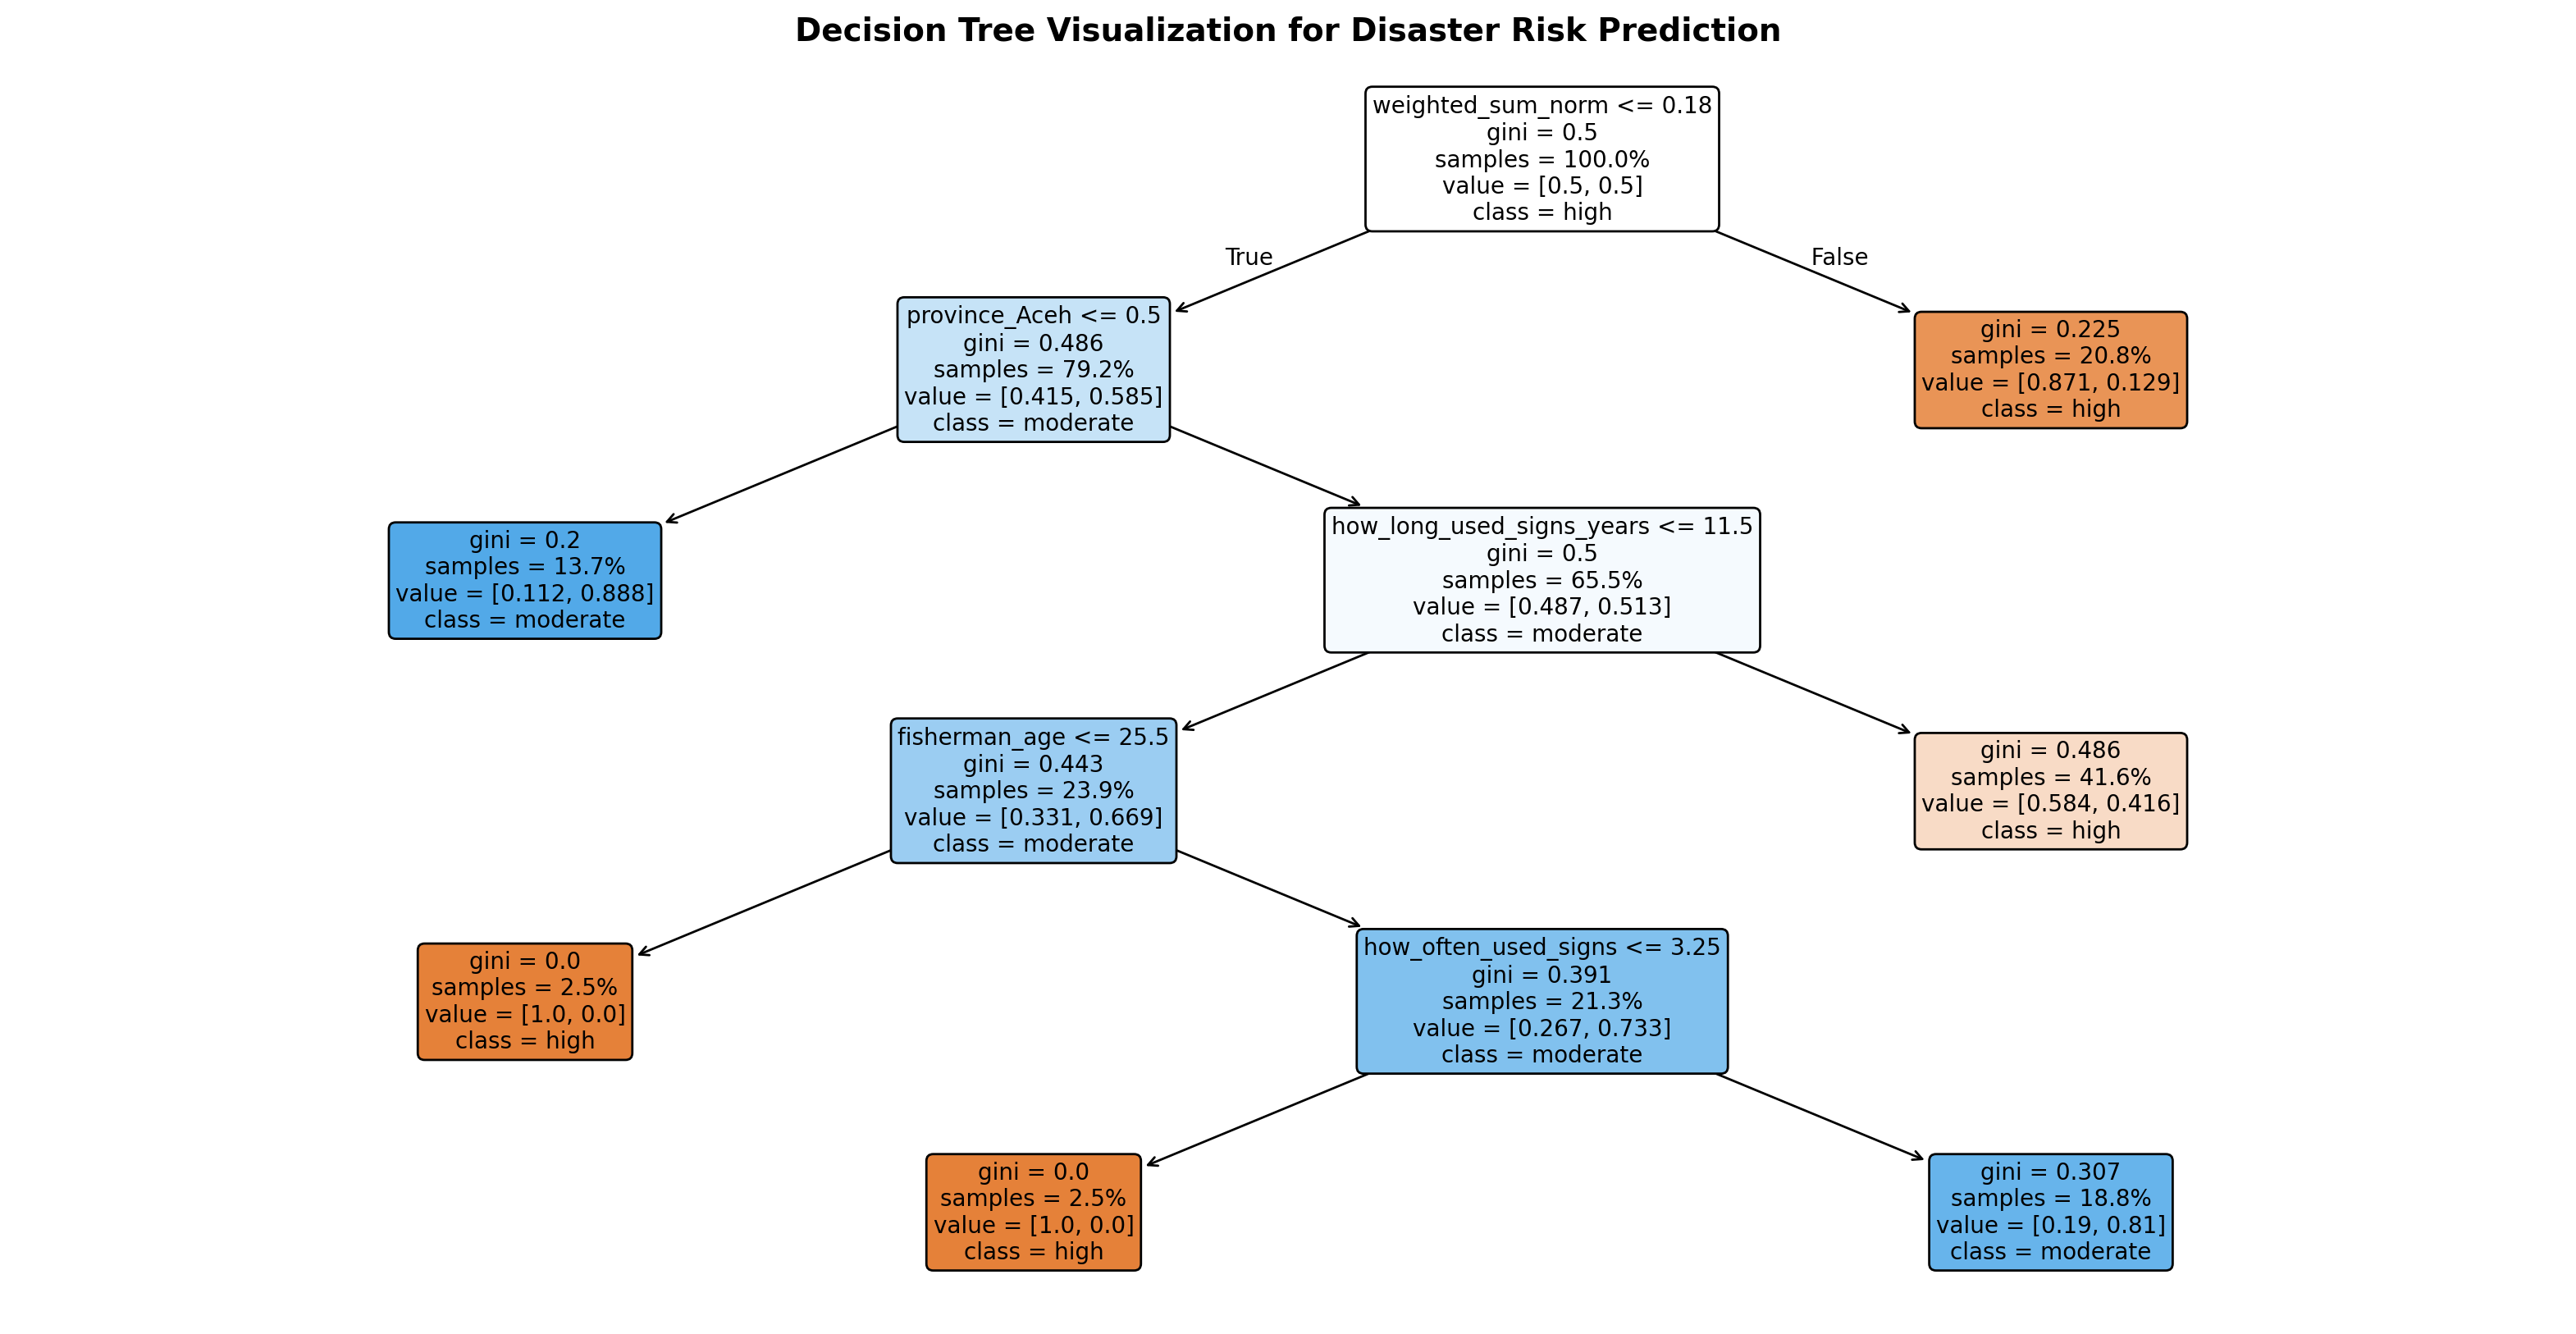

In [5]:
from ews.rule_generation.rule_representation import visualize_decision_tree_graph

best_model = result["best_model"]

feature_names = best_model.feature_names_in_.tolist()

visualize_decision_tree_graph(best_model, feature_names)
